<a href="https://colab.research.google.com/github/vsvale/IGTI-Bootcamp-Desenvolvedor-Python/blob/main/IGTI_Mod_3_Pandas_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

#read csv
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')

#head
df.head(3)

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente


In [ ]:
#read 2 worksheets excel
excel_file = pd.ExcelFile('https://pycourse.s3.amazonaws.com/temperature.xlsx')
sheet1 = pd.read_excel(excel_file,sheet_name='Sheet1')
sheet2 = pd.read_excel(excel_file,sheet_name='Sheet2')

In [ ]:
#rename columns
sheet1.columns = ['col1','col2','col3']

In [ ]:
#column types
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [ ]:
#date to datetime
df['date'] = pd.to_datetime(df['date'])

#date as index
df = df.set_index('date')
print(df.index)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01'],
              dtype='datetime64[ns]', name='date', freq=None)


In [ ]:
#descritive statistics
df.describe()


,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [ ]:
#select temperatura
df.loc[:,'temperatura']

date
2020-01-01    29.1
2020-02-01    31.2
2020-03-01    28.5
2020-04-01    28.0
2020-05-01    24.0
2020-06-01    20.0
Name: temperatura, dtype: float64

In [ ]:
#select classification
df.iloc[:,1]

date
2020-01-01          quente
2020-02-01    muito quente
2020-03-01          quente
2020-04-01          quente
2020-05-01     confortavel
2020-06-01            frio
Name: classification, dtype: object

In [ ]:
#select temperatura, classification
df[['temperatura','classification']]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [ ]:
#select * order by temperatura
df.sort_values(by=['temperatura'])

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [ ]:
#select * order by index descending
df.sort_index(ascending=False)

,temperatura,classification
date,,
2020-06-01,20.0,frio
2020-05-01,24.0,confortavel
2020-04-01,28.0,quente
2020-03-01,28.5,quente
2020-02-01,31.2,muito quente
2020-01-01,29.1,quente


In [ ]:
#select * where temperatura >= 25
df[df['temperatura']>=25]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente


In [ ]:
#select * where date <= '2020-03-01' and temperatura >=25
df[(df.index <= '2020-03-01') & (df['temperatura']>=25)]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente


In [ ]:
#select classification where date <= '2020-03-01' and temperatura >=25
df.loc[(df.index <= '2020-03-01') & (df['temperatura']>=25),['classification']]

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente


In [ ]:
#mean groupby
df.groupby('classification').mean()

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [ ]:
#sum groupby
df.groupby('classification').sum()

,temperatura
classification,
confortavel,24.0
frio,20.0
muito quente,31.2
quente,85.6


In [ ]:
#count groupby
df.groupby('classification').count()

,temperatura
classification,
confortavel,1
frio,1
muito quente,1
quente,3


In [ ]:
#delete column
newdf = df.drop('temperatura',axis=1)
newdf

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


In [ ]:
#df2 = df != df2 = df.copy()
df2 = df.copy()

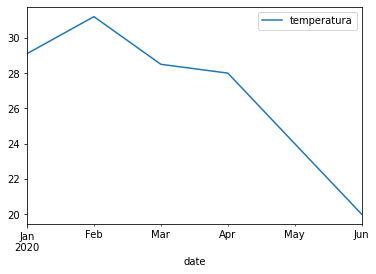

In [ ]:
df.plot()

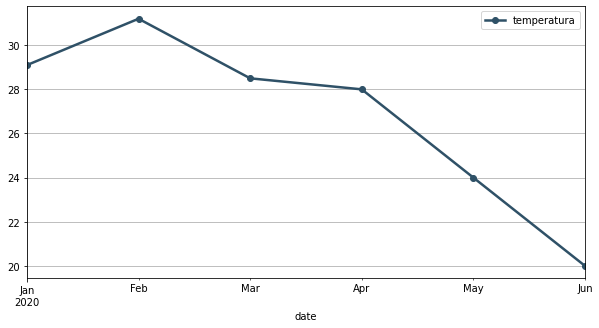

In [ ]:
df.plot(style='-o',
        linewidth=2.5,
        color='#2f5167',
        figsize=(10,5),
        grid=True)

In [ ]:
df['classification'].value_counts()

quente          3
muito quente    1
confortavel     1
frio            1
Name: classification, dtype: int64

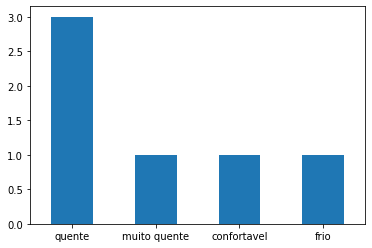

In [ ]:
df['classification'].value_counts().plot.bar(rot=0)

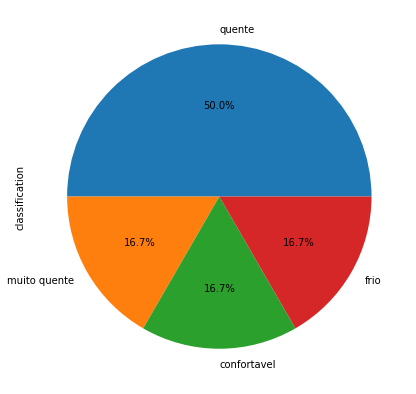

In [ ]:
df['classification'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,7))#autopct show %